In [36]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Set up and basic information

In [38]:
# Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

gme = yf.Ticker("GME")

# Get stock info (info -> very big, check for potentially important data)
gme_info = gme.info

# Lists of data to print
gme_title_list = ["shortName","symbol","city","state","country","website","phone","sector","industry","fullTimeEmployees","exchangeTimezoneName","exchange","quoteType","longBusinessSummary"]
gme_info_print = ["Name","Symbol","City","State","Country","Website","Phone","Sector","Industry","Number of Employees","Time Zone","Stock Exchange","Quote Type","Summary"]

print("$GME STOCK INFO")
print("--------------")

for i in range(len(gme_title_list)):
    print(gme_info_print[i] + ": " + str(gme_info[gme_title_list[i]]) + '\n')

$GME STOCK INFO
--------------
Name: GameStop Corporation

Symbol: GME

City: Grapevine

State: TX

Country: United States

Website: http://www.gamestop.com

Phone: 817 424 2000

Sector: Consumer Cyclical

Industry: Specialty Retail

Number of Employees: 14000

Time Zone: America/New_York

Stock Exchange: NYQ

Quote Type: EQUITY

Summary: GameStop Corp. operates as a multichannel video game, consumer electronics, and collectibles retailer in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, including controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and prepaid subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as

## GME Stats

In [62]:
# Get historical market data
hist = gme.history(period="1mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-28,21.309999,21.969999,20.350000,20.990000,8965900,0,0
2020-12-29,20.820000,21.070000,18.559999,19.379999,9241400,0,0
2020-12-30,19.379999,20.000000,18.850000,19.260000,5934400,0,0
2020-12-31,19.250000,19.799999,18.799999,18.840000,6918900,0,0
2021-01-04,19.000000,19.100000,17.150000,17.250000,10022500,0,0
2021-01-05,17.350000,18.080000,17.230000,17.370001,4961500,0,0
2021-01-06,17.340000,18.980000,17.330000,18.360001,6056200,0,0
2021-01-07,18.469999,19.450001,18.020000,18.080000,6129300,0,0
2021-01-08,18.180000,18.299999,17.080000,17.690001,6482000,0,0


In [87]:
mean = hist.mean().to_frame().rename(columns={0:"Mean"}).round(2)
maxdf = hist.max().to_frame().rename(columns={0:"Max"}).round(1)
mindf = hist.min().to_frame().rename(columns={0:"Min"}).round(1)
stats = pd.concat([mean,maxdf,mindf],axis=1)
stats

,Mean,Max,Min
Open,48.02,354.8,17.3
High,58.94,380.0,18.1
Low,39.58,249.0,17.1
Close,51.08,347.5,17.2
Volume,56305480.95,197157900.0,4961500.0
Dividends,0.00,0.0,0.0
Stock Splits,0.00,0.0,0.0


## GME Plots

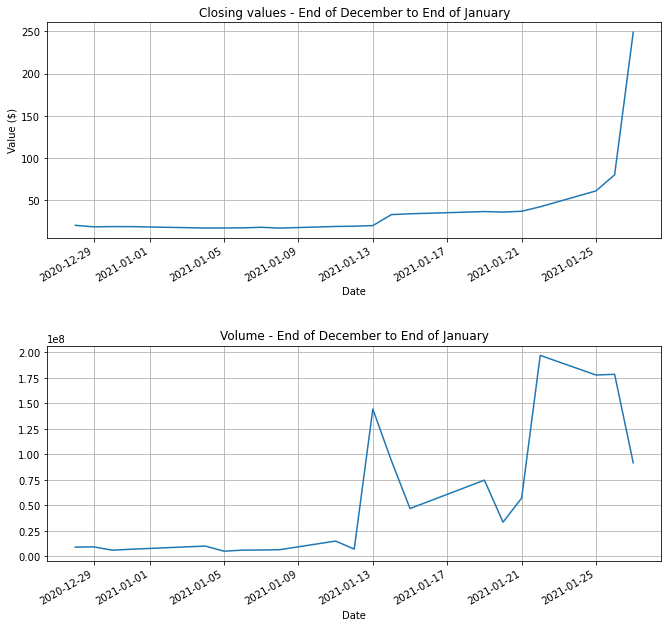

In [61]:
plt.subplot(211)
hist["Low"].plot(figsize=(11, 11))
plt.grid()
plt.title("Closing values - End of December to End of January")
plt.ylabel("Value ($)")

plt.subplot(212)
hist["Volume"].plot(figsize=(11, 11))
plt.grid()
plt.title("Volume - End of December to End of January")

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [93]:
gme.major_holders

,0,1
0,27.33%,% of Shares Held by All Insider
1,122.04%,% of Shares Held by Institutions
2,167.96%,% of Float Held by Institutions
3,286,Number of Institutions Holding Shares


In [94]:
gme.institutional_holders

,0,1
Earnings Date,2021-03-24 00:00:00,2021-03-29 00:00:00
Earnings Average,1.42,1.42
Earnings Low,0.84,0.84
Earnings High,1.83,1.83
Revenue Average,2293450000,2293450000
Revenue Low,2085220000,2085220000
Revenue High,2727000000,2727000000


In [95]:
gme.balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [96]:
gme.quarterly_balance_sheet

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [97]:
gme.cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [98]:
gme.quarterly_cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [99]:
gme.earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [100]:
gme.quarterly_earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [104]:
gme.sustainability

In [102]:
gme.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-08-17 10:52:00,Ascendiant Capital,Buy,,main
2012-09-04 05:41:00,Goldman Sachs,Buy,Neutral,up
2012-09-05 10:10:00,National Alliance,Market Perform,,main
2012-09-13 15:46:00,PiperJaffray,Neutral,,main
2012-10-09 16:19:00,PiperJaffray,Neutral,,main
...,...,...,...,...
2020-09-14 09:07:41,Jefferies,Buy,Hold,up
2020-09-14 10:29:57,Telsey Advisory Group,Outperform,Market Perform,up
2020-10-12 09:31:18,Jefferies,Hold,Buy,down


In [103]:
gme.calendar

,0,1
Earnings Date,2021-03-24 00:00:00,2021-03-29 00:00:00
Earnings Average,1.42,1.42
Earnings Low,0.84,0.84
Earnings High,1.83,1.83
Revenue Average,2293450000,2293450000
Revenue Low,2085220000,2085220000
Revenue High,2727000000,2727000000
